## Opening the CSV files

In [1]:
import pandas as pd

# Load the car-golf-info file
car_golf_info = pd.read_csv(r'/workspaces/Imum/car-golf-info.csv')

# Display the column names to verify them
print("Column names in car-golf-info.csv:", car_golf_info.columns)

Column names in car-golf-info.csv: Index(['id', 'make', 'model', 'submodel', 'modification_key', 'modification',
       'fuel', 'door_count', 'capacity', 'power1', 'power2', 'weight',
       'construction_start', 'construction_end', 'meta', 'final_submodel',
       'parsed_model', 'parsed_engine_type', 'parsed_engine_size',
       'parsed_options', 'parsed_category', 'parsed_transmission'],
      dtype='object')


In [2]:
import pandas as pd

# Attempt to load car-golf-dataset with error handling and specified delimiter
try:
    car_golf_dataset = pd.read_csv(
        r'/workspaces/Imum/car-golf-dataset.csv',
        delimiter=',',  # Change to ';' if commas don't work
        on_bad_lines='skip'  # Skip lines with inconsistent field counts
    )
    
    # Display column names to identify the correct name for the title column
    print("Column names in car-golf-dataset.csv:", car_golf_dataset.columns)
    
except Exception as e:
    print(f"Error loading car-golf-dataset.csv: {e}")

Column names in car-golf-dataset.csv: Index(['source_id', 'title', 'category', 'make', 'model', 'power', 'color',
       'capacity', 'transmission', 'fuel', 'construction_year', 'price_net',
       'price_gross', 'added', 'mileage', 'url'],
      dtype='object')


## Importing required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

## Task 1: Prepare the Data

In [4]:
# Task 1.1: Assign correct engine_type based on car-golf-info
# Get a list of all parsed engine types for matching
engine_types_list = car_golf_info['parsed_engine_type'].dropna().unique()

# Function to extract engine type based on parsed engine types
def extract_engine_type(title):
    for engine_type in engine_types_list:
        if engine_type in title:
            return engine_type
    return 'Unknown'  # Return Unknown if no match is found

# Apply the function to create a new column 'extracted_engine_type'
car_golf_dataset['extracted_engine_type'] = car_golf_dataset['title'].apply(extract_engine_type)

# Rename 'extracted_engine_type' to engine_type
car_golf_dataset.rename(columns={'extracted_engine_type': 'engine_type'}, inplace=True)

In [5]:
car_golf_dataset.head()

,source_id,title,category,make,model,power,color,capacity,transmission,fuel,construction_year,price_net,price_gross,added,mileage,url,engine_type
0,312826845,Volkswagen Golf Var. VII 2.0 TDI DSG GTD Sport...,Estate Car,volkswagen,golf,181,NaN,1968,Automatic transmission,Diesel,00:00.0,19784.0,22950.0,12:39.0,91800.0,https://suchen.mobile.de/fahrzeuge/details.htm...,TDI
1,311592214,Volkswagen Golf VII Sportsvan Van/Lounge 2.0 T...,Saloon,volkswagen,golf,148,NaN,1968,Automatic transmission,Diesel,00:00.0,NaN,15920.0,12:55.0,92004.0,https://suchen.mobile.de/fahrzeuge/details.htm...,TDI
2,312569111,Volkswagen Golf Sportsvan 1.2 TSI Lounge AAC ...,Van / Minibus,volkswagen,golf,109,NaN,1197,Manual gearbox,Petrol,00:00.0,NaN,14900.0,29:05.0,56150.0,https://suchen.mobile.de/fahrzeuge/details.htm...,TSI
3,299066532,Volkswagen Golf 7 Sportsvan Allstar 1.6 TDI BM...,Saloon,volkswagen,golf,109,NaN,1598,Manual gearbox,Diesel,00:00.0,NaN,13450.0,29:40.0,88500.0,https://suchen.mobile.de/fahrzeuge/details.htm...,TDI
4,308565853,Volkswagen Golf VII Sportsvan Comfortline 1.6T...,Van / Minibus,volkswagen,golf,114,NaN,1598,Automatic transmission,Diesel,00:00.0,15940.0,18490.0,30:29.0,56000.0,https://suchen.mobile.de/auto-inserat/volkswag...,TDI


In [6]:
# Task 1.2: Assign correct category based on car-golf-info
# Create a mapping dictionary from submodel to category
category_mapping = car_golf_info.set_index('submodel')['parsed_category'].to_dict()

# Function to map categories based on title
def map_category(row):
    for submodel, category in category_mapping.items():
        if submodel in row['title']:
            return category  # Return the mapped category if a match is found
    return row['category']  # Return the original category if no mapping is found

# Apply the mapping function to create a new column 'improved_category'
car_golf_dataset['improved_category'] = car_golf_dataset.apply(map_category, axis=1)

# Drop the old category column
car_golf_dataset.drop(columns=['category'], inplace=True)

# Rename 'improved_category' to category
car_golf_dataset.rename(columns={'improved_category': 'category'}, inplace=True)

A quick glimse of Data

In [7]:
car_golf_dataset.head()

,source_id,title,make,model,power,color,capacity,transmission,fuel,construction_year,price_net,price_gross,added,mileage,url,engine_type,category
0,312826845,Volkswagen Golf Var. VII 2.0 TDI DSG GTD Sport...,volkswagen,golf,181,NaN,1968,Automatic transmission,Diesel,00:00.0,19784.0,22950.0,12:39.0,91800.0,https://suchen.mobile.de/fahrzeuge/details.htm...,TDI,Estate Car
1,311592214,Volkswagen Golf VII Sportsvan Van/Lounge 2.0 T...,volkswagen,golf,148,NaN,1968,Automatic transmission,Diesel,00:00.0,NaN,15920.0,12:55.0,92004.0,https://suchen.mobile.de/fahrzeuge/details.htm...,TDI,Saloon
2,312569111,Volkswagen Golf Sportsvan 1.2 TSI Lounge AAC ...,volkswagen,golf,109,NaN,1197,Manual gearbox,Petrol,00:00.0,NaN,14900.0,29:05.0,56150.0,https://suchen.mobile.de/fahrzeuge/details.htm...,TSI,Van / Minibus
3,299066532,Volkswagen Golf 7 Sportsvan Allstar 1.6 TDI BM...,volkswagen,golf,109,NaN,1598,Manual gearbox,Diesel,00:00.0,NaN,13450.0,29:40.0,88500.0,https://suchen.mobile.de/fahrzeuge/details.htm...,TDI,Saloon
4,308565853,Volkswagen Golf VII Sportsvan Comfortline 1.6T...,volkswagen,golf,114,NaN,1598,Automatic transmission,Diesel,00:00.0,15940.0,18490.0,30:29.0,56000.0,https://suchen.mobile.de/auto-inserat/volkswag...,TDI,Van / Minibus


## Task 2: Clean the Data

In [8]:
# ---------------------------
# Task 2: Detect Suspicious Rows
# ---------------------------

# Example 1: Detect DSG vs Manual transmission mismatch with handling for NaN values
def is_suspicious_transmission(row):
    """Check for contradictions in transmission types."""
    title = row['title'] if isinstance(row['title'], str) else ''
    transmission = row['transmission'] if isinstance(row['transmission'], str) else ''
    
    if 'DSG' in title and 'Manual' in transmission:
        return True
    return False

# Example 2: Detect hybrid vs fuel mismatch with handling for NaN values
def is_suspicious_fuel(row):
    """Check for inconsistencies between fuel type and hybrid designation."""
    title = row['title'] if isinstance(row['title'], str) else ''
    fuel = row['fuel'] if isinstance(row['fuel'], str) else ''
    
    if 'hybrid' in title.lower() and 'petrol' in fuel.lower():
        return True
    return False

# Example 3: Check for power inconsistency
def has_power_mismatch(row):
    """Check for power mismatches in the title."""
    title = row['title'] if isinstance(row['title'], str) else ''
    power = row['power'] if 'power' in row else None  # Ensure 'power' column is handled
    
    # Example condition: Check if title contains power and power is None or invalid
    if 'power' in title.lower() and (power is None or power == ''):
        return True
    return False

# Create a column for suspicious rows
car_golf_dataset['suspicious'] = car_golf_dataset.apply(lambda row: 
    is_suspicious_transmission(row) or 
    is_suspicious_fuel(row) or 
    has_power_mismatch(row), axis=1)

# Filter out suspicious rows
suspicious_rows = car_golf_dataset[car_golf_dataset['suspicious'] == True]

# Display suspicious rows
suspicious_rows.head()

,source_id,title,make,model,power,color,capacity,transmission,fuel,construction_year,price_net,price_gross,added,mileage,url,engine_type,category,suspicious
394,358531274,Volkswagen Golf VIII 1.4 eHybrid DSG GTE/LED,volkswagen,golf,241,NaN,1,Automatic transmission,Hybrid (petrol/electric),NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Saloon,True
606,362169158,Volkswagen Golf 8 DSG 1.4 eHybrid GTE Navi LED...,Volkswagen,golf,241,NaN,1395,Automatic transmission,Hybrid (petrol/electric),NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Saloon,True
619,361168209,Volkswagen Golf VIII 1.4 GTE eHybrid Navi LEDP...,Volkswagen,golf,241,NaN,1395,Automatic transmission,Hybrid (petrol/electric),NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Saloon,True
659,355192568,Volkswagen Golf 1.4 eHYBRID GTE NAVI LED+ PDC ...,Volkswagen,golf,241,NaN,1395,Automatic transmission,Hybrid (petrol/electric),NaN,NaN,NaN,NaN,NaN,NaN,R,Saloon,True
939,370072534,Volkswagen Golf Variant VIII Life 2.0 TDI DSG ...,Volkswagen,Golf,148,NaN,0,Manual gearbox,Petrol,00:00.0,22227.0,26450.0,16:35.0,44450.0,https://m.mobile.de/svc/a/370072534?_no-call-t...,TDI,Estate Car,True


## Additional Task - Cleaning the Data

In [15]:
# Drop suspicious rows
car_golf_dataset = car_golf_dataset[car_golf_dataset['suspicious'] == False]

# Drop unnecessary columns
car_cleaned_data = car_golf_dataset.drop(['price_net', 'url', 'added', 'suspicious'], axis=1)

# Rearranging the columns in the specified order
car_cleaned_data = car_cleaned_data[['source_id', 'title', 'make', 'model', 'category', 'engine_type', 
                             'power', 'capacity', 'transmission', 'fuel', 'color', 
                             'construction_year', 'mileage', 'price_gross']]

# Display clean data
car_cleaned_data.head()

,source_id,title,make,model,category,engine_type,power,capacity,transmission,fuel,color,construction_year,mileage,price_gross
0,312826845,Volkswagen Golf Var. VII 2.0 TDI DSG GTD Sport...,volkswagen,golf,Estate Car,TDI,181,1968,Automatic transmission,Diesel,NaN,00:00.0,91800.0,22950.0
1,311592214,Volkswagen Golf VII Sportsvan Van/Lounge 2.0 T...,volkswagen,golf,Saloon,TDI,148,1968,Automatic transmission,Diesel,NaN,00:00.0,92004.0,15920.0
2,312569111,Volkswagen Golf Sportsvan 1.2 TSI Lounge AAC ...,volkswagen,golf,Van / Minibus,TSI,109,1197,Manual gearbox,Petrol,NaN,00:00.0,56150.0,14900.0
3,299066532,Volkswagen Golf 7 Sportsvan Allstar 1.6 TDI BM...,volkswagen,golf,Saloon,TDI,109,1598,Manual gearbox,Diesel,NaN,00:00.0,88500.0,13450.0
4,308565853,Volkswagen Golf VII Sportsvan Comfortline 1.6T...,volkswagen,golf,Van / Minibus,TDI,114,1598,Automatic transmission,Diesel,NaN,00:00.0,56000.0,18490.0


## Task 3: Visualize and Make Sense of Data

### Visualization 1: Distribution of Car Categories
This chart helps to understand the variety and prevalence of different car categories in the dataset.

/tmp/ipykernel_28056/4184701640.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_counts.index, x=category_counts.values, palette='viridis')


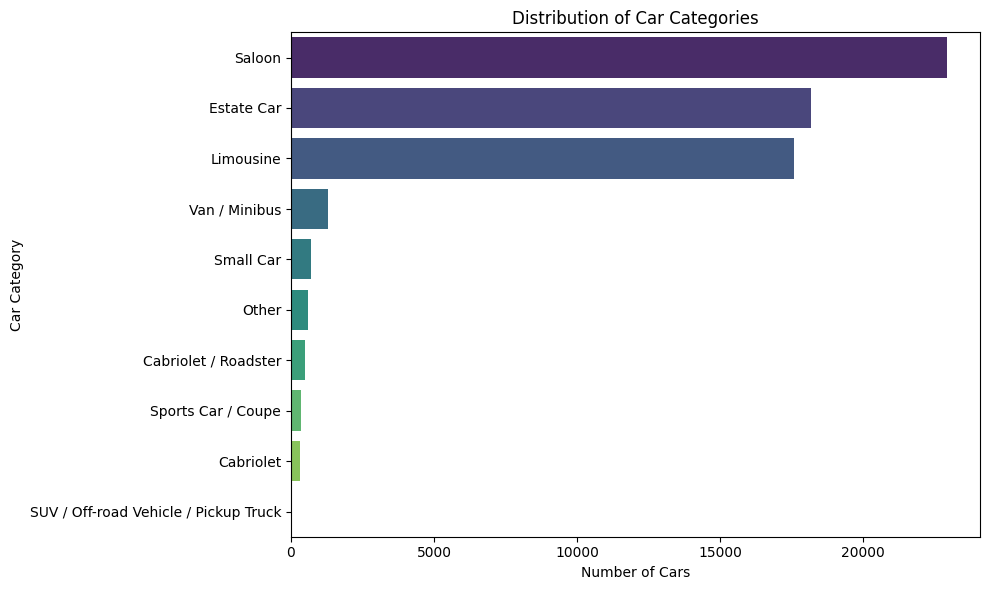

In [16]:
# Count the occurrences of each category
category_counts = car_cleaned_data['category'].value_counts()

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(y=category_counts.index, x=category_counts.values, palette='viridis')
plt.title('Distribution of Car Categories')
plt.xlabel('Number of Cars')
plt.ylabel('Car Category')
plt.tight_layout()
plt.show()

`Commentary: The bar chart indicates that some car categories are much more common than others. This suggests certain types of cars are more popular or readily available in the market, which may reflect consumer preferences or supply trends.`

### Visualization 2: Distribution of Engine Types
This shows the frequency of different engine types and highlights which types are most popular.

/tmp/ipykernel_28056/2557543650.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=engine_type_counts.index, y=engine_type_counts.values, palette='viridis')


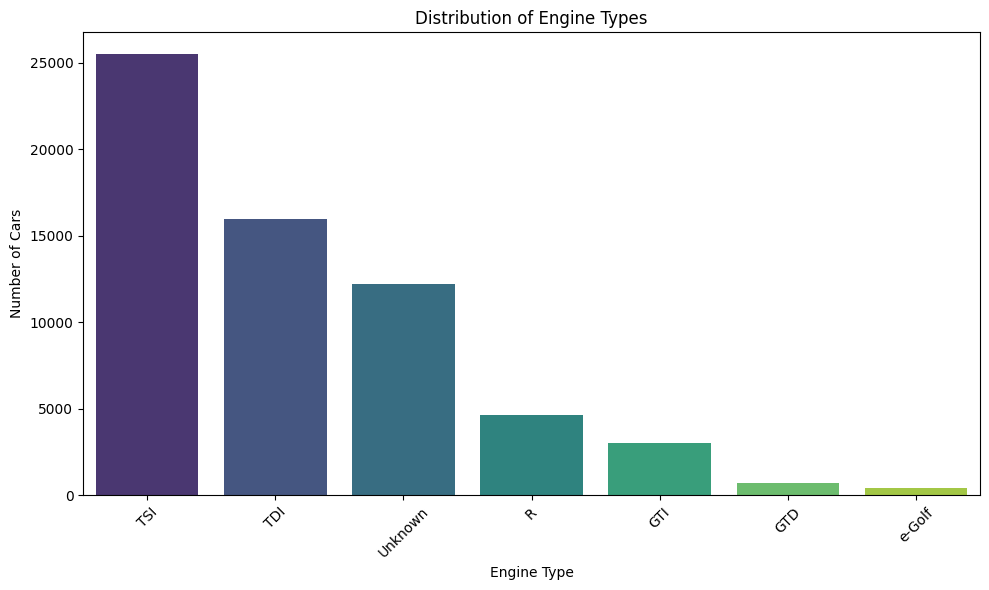

In [17]:
# Count the occurrences of each engine type
engine_type_counts = car_cleaned_data['engine_type'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=engine_type_counts.index, y=engine_type_counts.values, palette='viridis')
plt.title('Distribution of Engine Types')
plt.xlabel('Engine Type')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

`Commentary: The distribution of engine types reveals that certain engines dominate the market. For example, if traditional combustion engines have the highest count, it may indicate that alternative engine technologies are yet to gain widespread adoption.`

### Visualization 3: Price Distribution by Engine Type
This box plot examines how prices vary across different engine types.

/tmp/ipykernel_28056/1110254284.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=car_cleaned_data, x='engine_type', y='price_gross', palette='coolwarm')


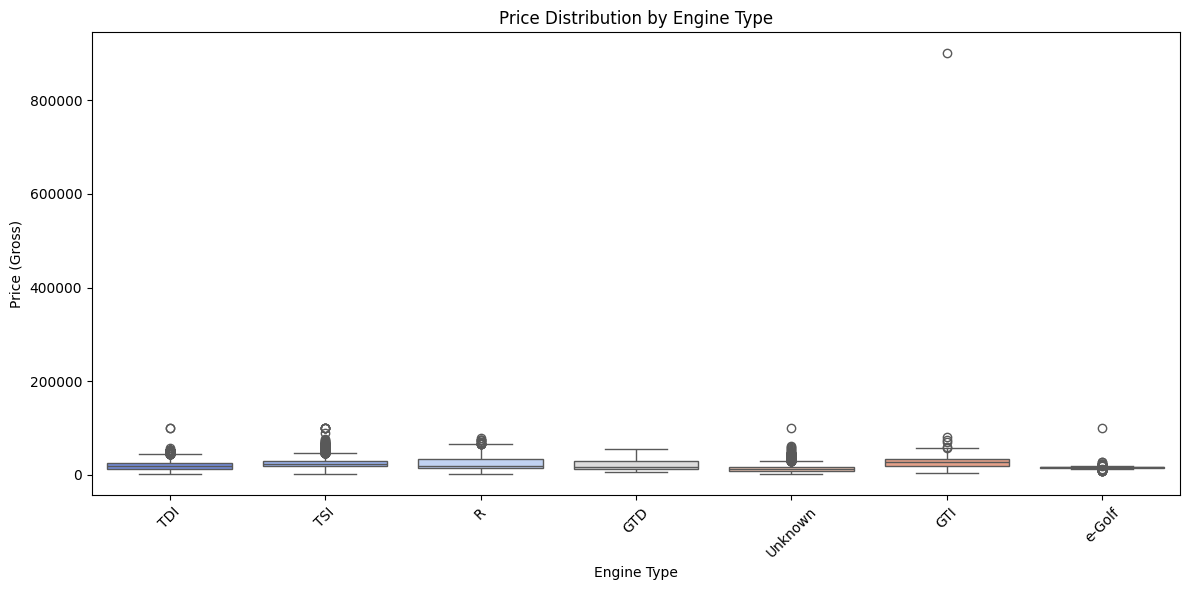

In [18]:
# Plotting the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=car_cleaned_data, x='engine_type', y='price_gross', palette='coolwarm')
plt.title('Price Distribution by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Price (Gross)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

`Commentary: The box plot shows the distribution and range of car prices for each engine type. It highlights which engine types tend to be associated with higher prices, possibly due to technological advantages or consumer demand.`

### Visualization 4: Trends in Fuel Types
This chart helps identify trends in fuel type usage, which could signal market shifts or preferences.

/tmp/ipykernel_28056/464400586.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fuel_counts.index, y=fuel_counts.values, palette='pastel')


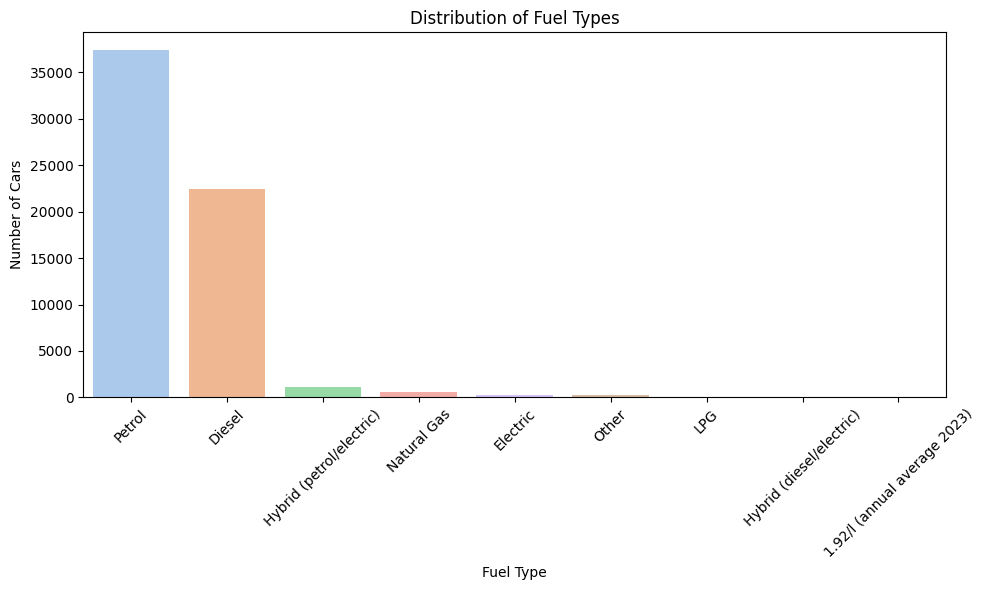

In [21]:
# Count the occurrences of each fuel type
fuel_counts = car_cleaned_data['fuel'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=fuel_counts.index, y=fuel_counts.values, palette='pastel')
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

`Commentary: The fuel type distribution highlights which fuels are most common. If petrol or diesel overwhelmingly dominates, there may be opportunities for growth in hybrid or electric vehicles, reflecting environmental concerns or regulatory pressures.`

### Additional - Visualization

#### Visualization 5: Relationship between Engine Power and Price
A scatter plot to observe how the engine power of cars correlates with their price. This can help identify whether higher engine power translates into a higher price.

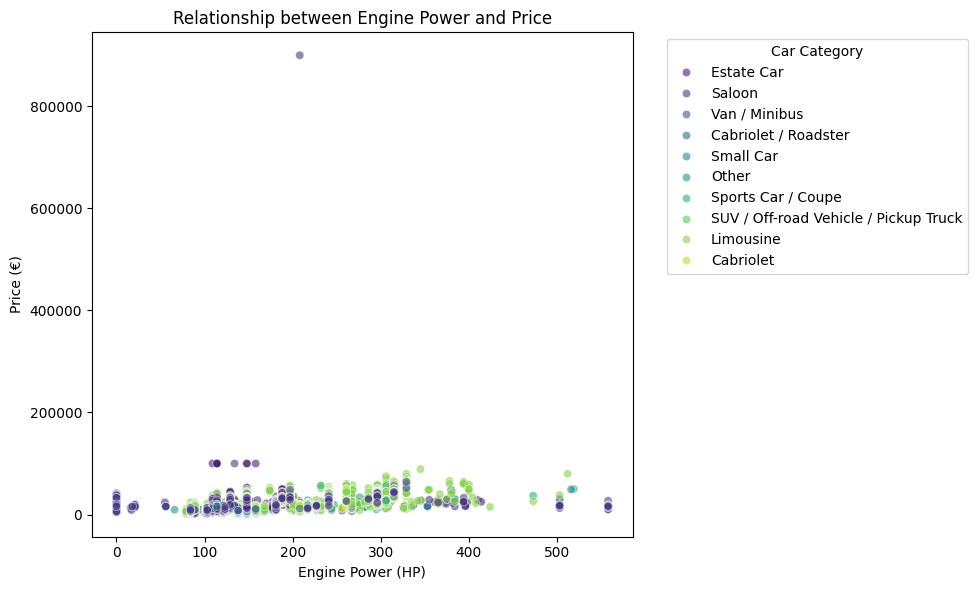

In [28]:
# Scatter plot of engine power vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=car_cleaned_data, x='power', y='price_gross', hue='category', palette='viridis', alpha=0.6)
plt.title('Relationship between Engine Power and Price')
plt.xlabel('Engine Power (HP)')
plt.ylabel('Price (€)')
plt.legend(title='Car Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

`Commentary: The scatter plot shows a trend where cars with higher engine power generally have a higher price, but there may also be exceptions. By categorizing the points by car type, you can see which categories tend to have more expensive or powerful cars. This visualization highlights the correlation between performance features and pricing.`

#### Visualization 6: Distribution of Mileage vs. Price by Fuel Type
A scatter plot with a focus on how the mileage of cars affects their price, segmented by fuel type. This can help identify patterns, such as whether cars with certain fuel types depreciate more quickly.

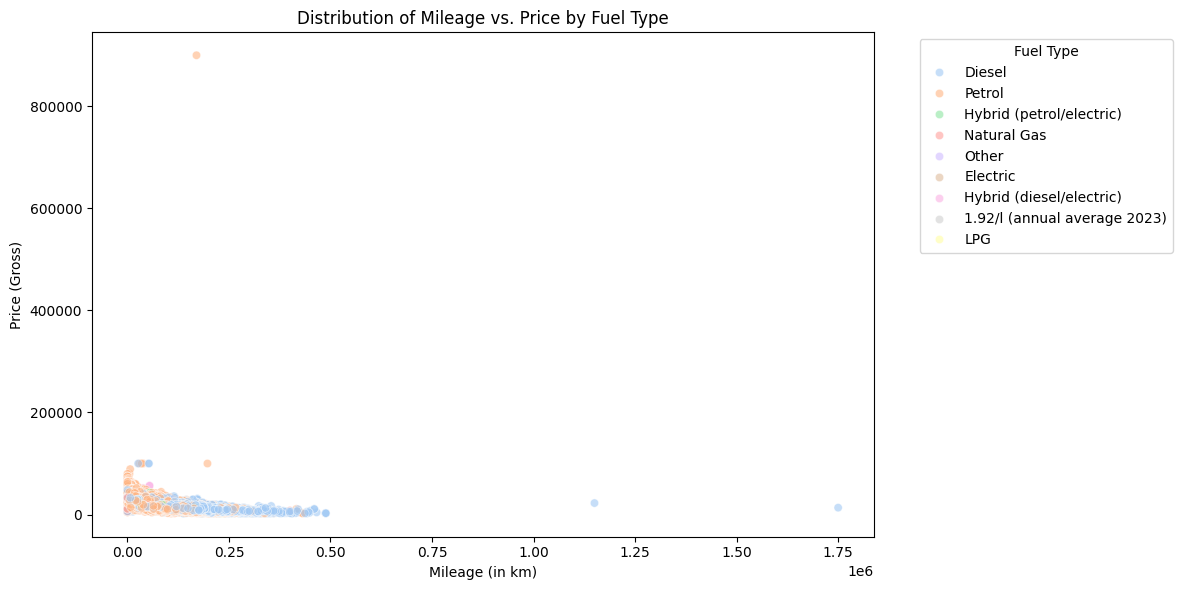

In [29]:
# Scatter plot of mileage vs. price by fuel type
plt.figure(figsize=(12, 6))
sns.scatterplot(data=car_cleaned_data, x='mileage', y='price_gross', hue='fuel', palette='pastel', alpha=0.6)
plt.title('Distribution of Mileage vs. Price by Fuel Type')
plt.xlabel('Mileage (in km)')
plt.ylabel('Price (Gross)')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

`Commentary: The scatter plot shows a trend where cars with higher engine power generally have a higher price, but there may also be exceptions. By categorizing the points by car type, you can see which categories tend to have more expensive or powerful cars. This visualization highlights the correlation between performance features and pricing.`

## Task 4: Deploying the Visuals in App